In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_prefix = "weather"  # Change this to any word you like
df =  pd.read_csv(f'{file_prefix}_result.csv')


# Assuming you have a DataFrame named 'df'
df.columns.values[0] = 'Method'

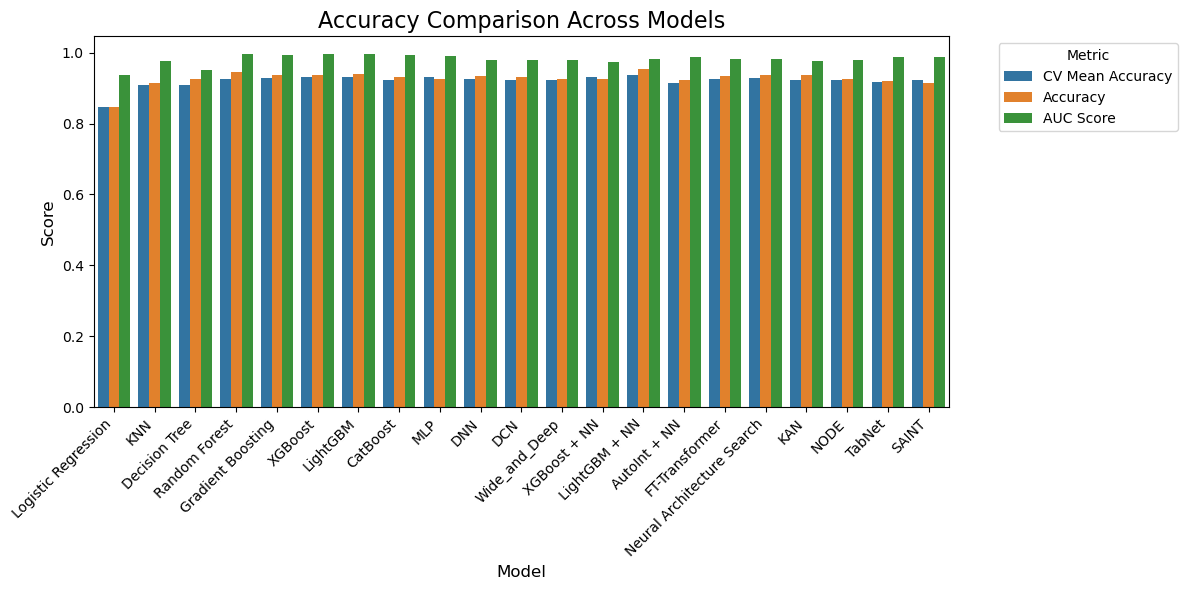

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded with your data

# Prepare the data for plotting
plot_data = df[['Method', 'CV Mean Accuracy', 'Accuracy', 'AUC Score']]

# Melt the dataframe to create a long format suitable for seaborn
melted_data = pd.melt(plot_data, id_vars=['Method'], var_name='Metric', value_name='Score')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Method', y='Score', hue='Metric', data=melted_data)

# Customize the plot
plt.title('Accuracy Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

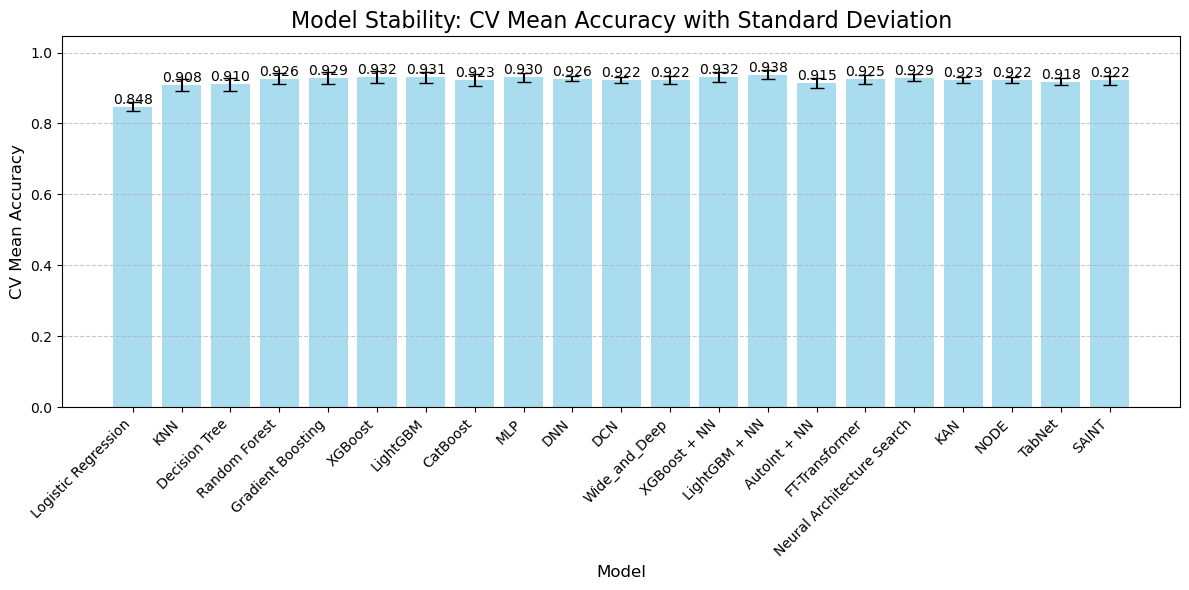

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded with your data

# Create the plot
plt.figure(figsize=(12, 6))

# Create the bar plot
bars = plt.bar(df['Method'], df['CV Mean Accuracy'], yerr=df['CV Std Accuracy'], 
               capsize=5, alpha=0.7, color='skyblue', ecolor='black')

# Customize the plot
plt.title('Model Stability: CV Mean Accuracy with Standard Deviation', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('CV Mean Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

# Adjust y-axis to start from 0 and have some headroom
plt.ylim(0, max(df['CV Mean Accuracy'] + df['CV Std Accuracy']) * 1.1)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
pd.reset_option('display.max_colwidth')

In [46]:
df["Method"]

0            Logistic Regression
1                            KNN
2                  Decision Tree
3                  Random Forest
4              Gradient Boosting
5                        XGBoost
6                       LightGBM
7                       CatBoost
8                            MLP
9                            DNN
10                           DCN
11                 Wide_and_Deep
12                  XGBoost + NN
13                 LightGBM + NN
14                  AutoInt + NN
15                FT-Transformer
16    Neural Architecture Search
17                           KAN
18                          NODE
19                        TabNet
20                         SAINT
Name: Method, dtype: object

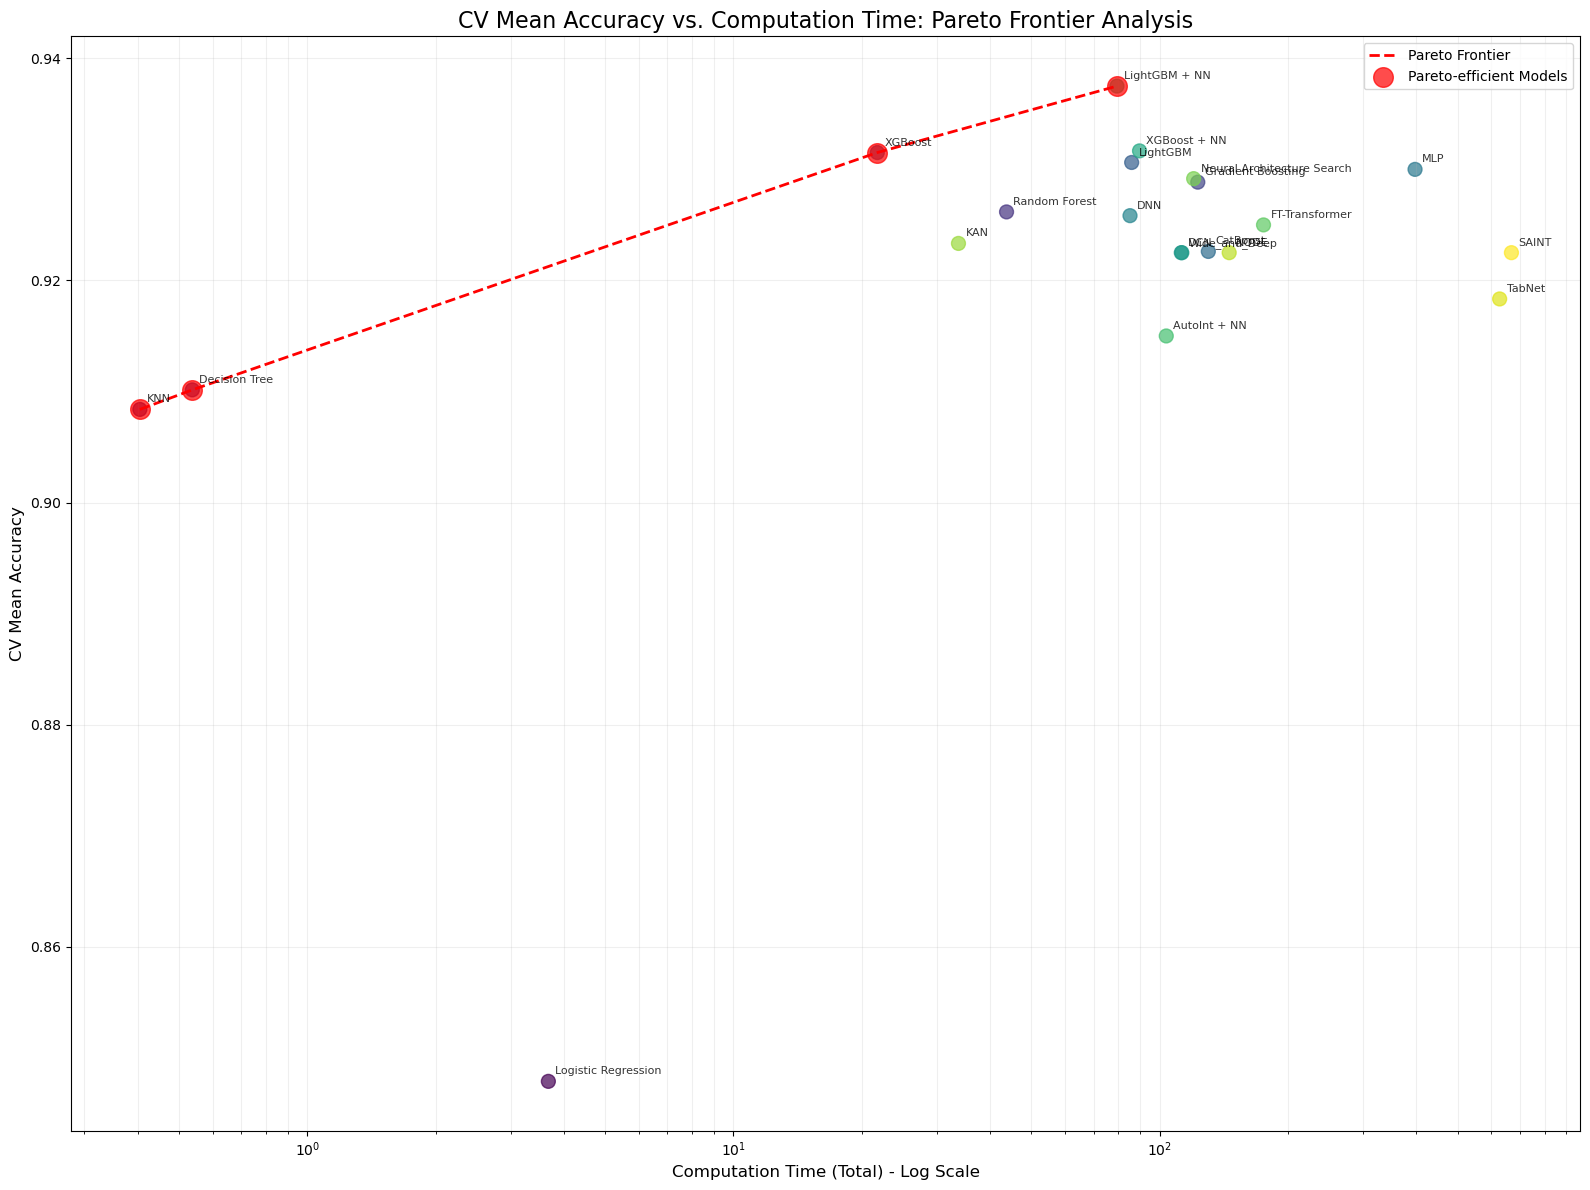

Pareto-efficient models:
KNN: Computation Time = 0.40, CV Mean Accuracy = 0.9084
Decision Tree: Computation Time = 0.54, CV Mean Accuracy = 0.9101
XGBoost: Computation Time = 21.75, CV Mean Accuracy = 0.9315
LightGBM + NN: Computation Time = 79.37, CV Mean Accuracy = 0.9375


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import spatial

# Assuming df is your DataFrame with the data you provided
# If not, you'll need to create it from your data source

def pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
    p_front = [myList[0]]    
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]:
                p_front.append(pair)
        else:
            if pair[1] <= p_front[-1][1]:
                p_front.append(pair)
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

# Create the plot
plt.figure(figsize=(16, 12))

# Scatter plot
scatter = plt.scatter(df['Computation Time (Total)'], df['CV Mean Accuracy'], 
                      c=df.index, cmap='viridis', s=100, alpha=0.7)

# Customize the plot
plt.title('CV Mean Accuracy vs. Computation Time: Pareto Frontier Analysis', fontsize=16)
plt.xlabel('Computation Time (Total) - Log Scale', fontsize=12)
plt.ylabel('CV Mean Accuracy', fontsize=12)
plt.xscale('log')  # Use log scale for computation time

# Add model names as annotations
for i, row in df.iterrows():
    plt.annotate(row['Method'], (row['Computation Time (Total)'], row['CV Mean Accuracy']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

# Compute and plot Pareto frontier
p_front = pareto_frontier(df['Computation Time (Total)'].values, df['CV Mean Accuracy'].values, 
                          maxX=False, maxY=True)
plt.plot(p_front[0], p_front[1], 'r--', linewidth=2, label='Pareto Frontier')

# Highlight Pareto-efficient points
pareto_points = spatial.ConvexHull(list(zip(p_front[0], p_front[1]))).vertices
pareto_df = df[df['Computation Time (Total)'].isin(p_front[0]) & df['CV Mean Accuracy'].isin(p_front[1])]
plt.scatter(pareto_df['Computation Time (Total)'], pareto_df['CV Mean Accuracy'], 
            c='red', s=200, alpha=0.7, zorder=5, label='Pareto-efficient Models')

# Add gridlines for better readability
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add legend
plt.legend(fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print out the Pareto-efficient models
print("Pareto-efficient models:")
for _, row in pareto_df.iterrows():
    print(f"{row['Method']}: Computation Time = {row['Computation Time (Total)']:.2f}, CV Mean Accuracy = {row['CV Mean Accuracy']:.4f}")

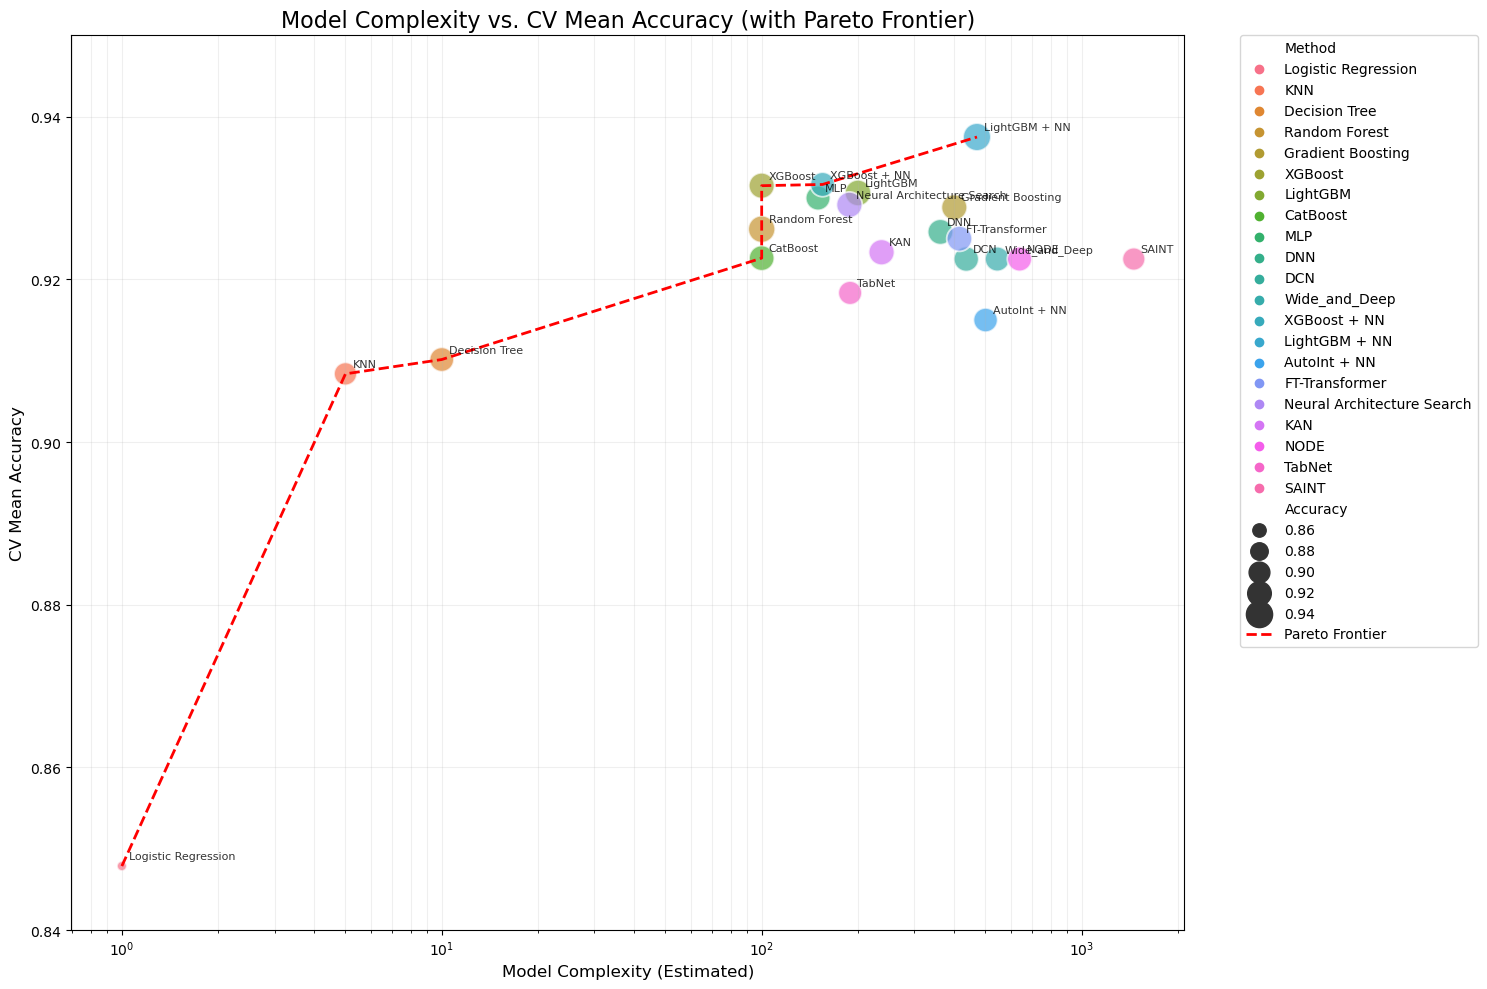

Complexity values for each method:
Logistic Regression: 1
KNN: 5
Decision Tree: 10
Random Forest: 100
XGBoost: 100
CatBoost: 100
MLP: 150
XGBoost + NN: 155
Neural Architecture Search: 188
TabNet: 189
LightGBM: 200
KAN: 237
DNN: 362
Gradient Boosting: 400
FT-Transformer: 415
DCN: 436
LightGBM + NN: 471
AutoInt + NN: 501
Wide_and_Deep: 545
NODE: 640
SAINT: 1456

Models on the Pareto frontier:
Logistic Regression: Complexity = 1, CV Mean Accuracy = 0.8479
KNN: Complexity = 5, CV Mean Accuracy = 0.9084
Decision Tree: Complexity = 10, CV Mean Accuracy = 0.9101
Random Forest: Complexity = 100, CV Mean Accuracy = 0.9262
XGBoost: Complexity = 100, CV Mean Accuracy = 0.9315
CatBoost: Complexity = 100, CV Mean Accuracy = 0.9226
XGBoost + NN: Complexity = 155, CV Mean Accuracy = 0.9317
LightGBM + NN: Complexity = 471, CV Mean Accuracy = 0.9375


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np


# Function to compute Pareto frontier
def pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
    p_front = [myList[0]]    
    for pair in myList[1:]:
        if maxY:
            if pair[1] >= p_front[-1][1]:
                p_front.append(pair)
        else:
            if pair[1] <= p_front[-1][1]:
                p_front.append(pair)
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

# Create the plot
plt.figure(figsize=(15, 10))

# Create the scatter plot
scatter = sns.scatterplot(data=df, x='Complexity', y='CV Mean Accuracy', 
                          hue='Method', size='Accuracy', sizes=(50, 400), alpha=0.7)

# Compute and plot Pareto frontier
p_frontX, p_frontY = pareto_frontier(df['Complexity'].values, df['CV Mean Accuracy'].values, maxX=False, maxY=True)
plt.plot(p_frontX, p_frontY, 'r--', linewidth=2, label='Pareto Frontier')

# Customize the plot
plt.title('Model Complexity vs. CV Mean Accuracy (with Pareto Frontier)', fontsize=16)
plt.xlabel('Model Complexity (Estimated)', fontsize=12)
plt.ylabel('CV Mean Accuracy', fontsize=12)

# Add model names as annotations
for i, row in df.iterrows():
    plt.annotate(row['Method'], (row['Complexity'], row['CV Mean Accuracy']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

# Adjust axes
plt.xscale('log')  # Use log scale for complexity
plt.ylim(0.84, 0.95)  # Adjust y-axis to focus on the range of accuracies

# Add gridlines for better readability
plt.grid(True, which="both", ls="-", alpha=0.2)

# Adjust legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print out the complexity values for each method
print("Complexity values for each method:")
for _, row in df.sort_values('Complexity').iterrows():
    print(f"{row['Method']}: {row['Complexity']}")

# Identify models on the Pareto frontier
pareto_models = df[df.apply(lambda row: (row['Complexity'], row['CV Mean Accuracy']) in zip(p_frontX, p_frontY), axis=1)]

print("\nModels on the Pareto frontier:")
for _, row in pareto_models.iterrows():
    print(f"{row['Method']}: Complexity = {row['Complexity']}, CV Mean Accuracy = {row['CV Mean Accuracy']:.4f}")